Support Calls                0
Support Calls                0
Total Spend                  0
Contract Length_Quarterly    0
Contract Length_Monthly      0
Age                          0
Gender_Male                  0
Usage Frequency              0
dtype: int64
(212186, 8)
(212186,)
{
    "accuracy": 0.8719237282544151,
    "roc_auc": 0.9051939430224684,
    "precision": 0.7555410264792416,
    "recall": 0.8471830211502511,
    "f1": 0.798742029686717,
    "true_negatives": 56179,
    "false_positives": 7478,
    "false_negatives": 4169,
    "true_positives": 23112
}


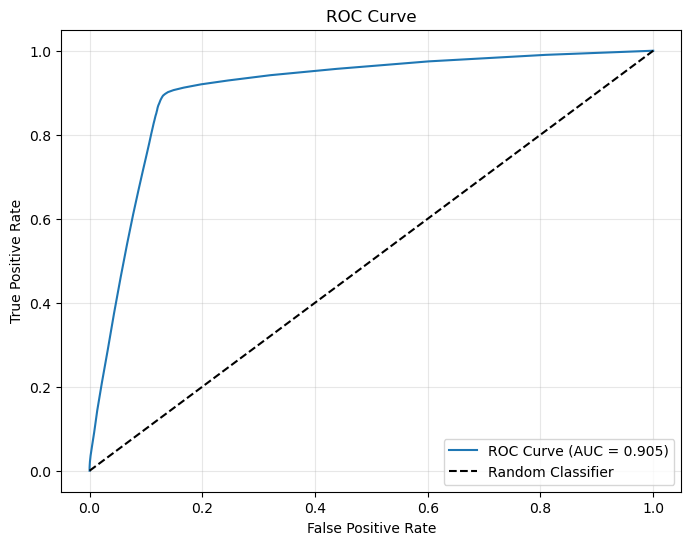

In [21]:
from MAT311.load import load_data, evaluate_model, plot_roc_curve, create_submission
import json
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd



features = ["Support Calls", "Total Spend", "Contract Length", "Age", "Gender", "Usage Frequency"]

target = "Churn"

X_train, X_test, y_train, y_test, X_submission = load_data(target, features)

print(X_submission.isna().sum().sort_values())

model = KNeighborsClassifier(n_neighbors = 51)
print(X_train.shape)
print(y_train.shape)

model.fit(X_train, y_train)

KNN_p = model.predict_proba(X_test)
KNN_v = model.predict(X_test)
# print(KNN_p[1])
KNN_Scores = evaluate_model(y_test, KNN_v, KNN_p[:,1])

print(json.dumps(KNN_Scores, indent=4))

plot_roc_curve(y_test, KNN_p[:,1])


In [22]:
results = create_submission(model, X_submission, 9)

results.describe()

,CustomerID,Churn
count,133776.000000,133776.000000
mean,253147.694273,0.614902
std,145702.951964,0.283020
min,0.000000,0.000000
25%,127106.750000,0.588235
50%,253324.500000,0.725490
75%,379358.500000,0.803922
max,505204.000000,1.000000


In [2]:
model_proportions = pd.Series(KNN_v).value_counts(normalize=True)
print(model_proportions)

0    0.660373
1    0.339627
Name: proportion, dtype: float64


In [3]:
round(results["Churn"], 1).sort_values().value_counts()


NameError: name 'results' is not defined

<Axes: >

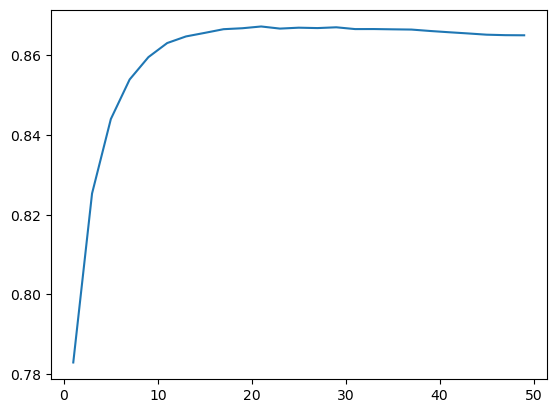

In [18]:
import seaborn as sns

auc = {}
for i in range(1, 51, 2):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)

    KNN_p = model.predict_proba(X_test)
    KNN_v = model.predict(X_test)
    # print(KNN_p[1])
    KNN_Scores = evaluate_model(y_test, KNN_v)    
    auc[i] = KNN_Scores["roc_auc"]

sns.lineplot(x = auc.keys(), y = auc.values())


In [19]:
auc_max = max(auc, key =auc.get)
print(auc_max)


21
